# Dataset Downloading 


In [1]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

     |████████████████████████████████| 61kB 7.8MB/s 


In [2]:
#Download your api kaggle.jdon from kaggle and upload it here
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"navinbondade23","key":"1e8e85d548f349b67f2e015da44880bd"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d nurnob101/rice-disease

100% 3.98G/3.99G [01:16<00:00, 52.6MB/s]
100% 3.99G/3.99G [01:16<00:00, 55.9MB/s]


In [11]:
#unziping the file
from zipfile import ZipFile
file_name = '/content/rice-disease.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


# Libraries

In [164]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, MaxPool2D, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Data Visualization


In [13]:
gudi_rotten = glob('/content/Data-image/Gudi_rotten/*.jpg')
apex_blast = glob('/content/Data-image/apex_blast/*.jpg')
leaf_blast = glob('/content/Data-image/leaf_blast/*.jpg')
leaf_burn = glob('/content/Data-image/leaf_burn/*.jpg')
neck_blast_paddy = glob('/content/Data-image/neck_blast_paddy/*.jpg')

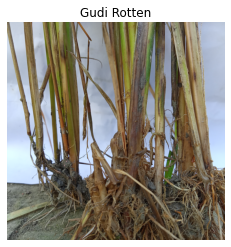

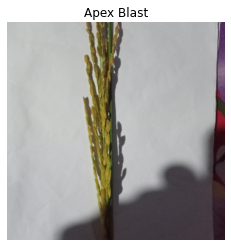

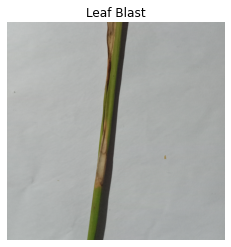

In [19]:
plt.title('Gudi Rotten')
plt.imshow(image.load_img(np.random.choice(gudi_rotten)))
plt.axis('off')
plt.show()

plt.title('Apex Blast')
plt.imshow(image.load_img(np.random.choice(apex_blast)))
plt.axis('off')
plt.show()

plt.title('Leaf Blast')
plt.imshow(image.load_img(np.random.choice(leaf_blast)))
plt.axis('off')
plt.show()

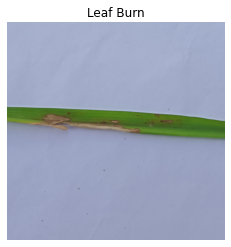

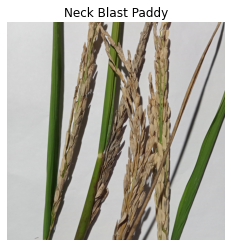

In [17]:
plt.title('Leaf Burn')
plt.imshow(image.load_img(np.random.choice(leaf_burn)))
plt.axis('off')
plt.show()

plt.title('Neck Blast Paddy')
plt.imshow(image.load_img(np.random.choice(neck_blast_paddy)))
plt.axis('off')
plt.show()

# Train Test Split

In [22]:
pip install split-folders tqdm

In [24]:
import splitfolders  
splitfolders.ratio("/content/Data-image/", output="/content/Dataset/", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 2500 files [01:31, 27.24 files/s]


# Image Preprocessing 

In [44]:
img_width = 150
img_height = 150

datagen = ImageDataGenerator(rescale=1/255.0, horizontal_flip=True, validation_split = 0.2)

In [45]:
train_data_gen = datagen.flow_from_directory(directory='/content/Dataset/train', target_size = (img_width, img_height), subset='training')

Found 1600 images belonging to 5 classes.


In [46]:
vali_data_gen = datagen.flow_from_directory(directory='/content/Dataset/test',target_size = (img_width, img_height), subset='validation')

Found 50 images belonging to 5 classes.


# Model Creation

In [55]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (img_width, img_height, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(192, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))


model.add(Dense(228, activation='relu'))
model.add(Dropout(0.3))



model.add(Dense(5, activation='softmax'))

In [56]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 18, 18, 192)      

In [58]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

# Model Training

In [59]:
r = model.fit_generator(generator=train_data_gen, steps_per_epoch=len(train_data_gen), epochs=10, validation_data= vali_data_gen, validation_steps = len(vali_data_gen), callbacks=[callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50/50 [==============================] - 215s 4s/step - loss: 1.4980 - accuracy: 0.2930 - val_loss: 0.9226 - val_accuracy: 0.5800
Epoch 2/10
50/50 [==============================] - 211s 4s/step - loss: 0.7607 - accuracy: 0.6255 - val_loss: 0.7130 - val_accuracy: 0.5800
Epoch 3/10
50/50 [==============================] - 211s 4s/step - loss: 0.5470 - accuracy: 0.7515 - val_loss: 0.4725 - val_accuracy: 0.8000
Epoch 4/10
50/50 [==============================] - 212s 4s/step - loss: 0.3845 - accuracy: 0.8672 - val_loss: 0.4757 - val_accuracy: 0.8400
Epoch 5/10
50/50 [==============================] - 212s 4s/step - loss: 0.2973 - accuracy: 0.8939 - val_loss: 0.3566 - val_accuracy: 0.8400
Epoch 6/10
50/50 [==============================] - 210s 4s/step - loss: 0.2886 - accuracy: 0.8868 - val_loss: 0.2247 - val_accuracy: 0.8800
Epoch 7/10
50/50 [==============================] - 212s 4s/step - loss: 0.1755 - accuracy: 0.9419 - val_loss: 0.2997 - val_accuracy: 0.9000
Epoch 8/10
50

# Accuracy

In [139]:
import math   
print(f'The traning accuracy of model is {math.floor(r.history["accuracy"][-1] * 100)} %')
print(f'The validation accuracy of model is {math.floor(r.history["val_accuracy"][-1] * 100)} %')

The traning accuracy of model is 93 %
The validation accuracy of model is 92 %


# Loss

In [180]:
print(f'The traning loss of model is {r.history["loss"][-1]}')
print(f'The validation loss of model is {r.history["val_loss"][-1]}')

The traning loss of model is 0.18121337890625
The validation loss of model is 0.1983902007341385


In [1]:
# this clearly shows that model has trained perfectly, no overfitting or underfitting

# Loss and Accuracy Visualization

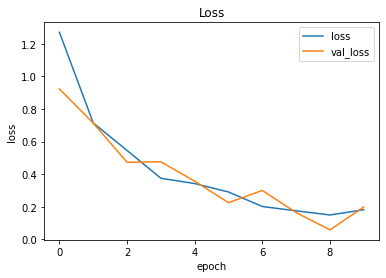

In [64]:
plt.title('Loss')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

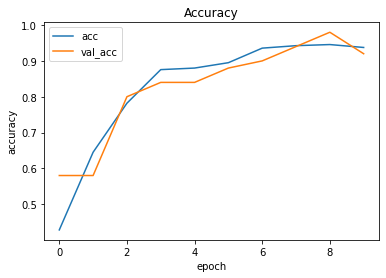

In [66]:
plt.title('Accuracy')
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

# Model Saving 

In [67]:
model.save('Rice_Diseases.h5')

# Model Prediction

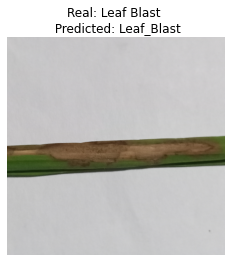

In [97]:
from PIL import Image
from tensorflow.keras.preprocessing import image
x = [2,0,1,3,4]
y = []
txt = ['Gudi_Rotten', 'Apex_Blast', 'Leaf_Blast', 'Leaf_Burn', 'Neck_Blast_Paddy']
test_image= '/content/Dataset/val/leaf_blast/IMG20201109190117_00.jpg'
Orginal = "Leaf Blast"
open_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(150,150))
test_image=image.img_to_array(test_image)
test_image=test_image/255.0
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
result=np.argmax(result)
y.append(result)
Name=txt[result]
plt.imshow(open_image)
plt.title(f'Real: {Orginal} \n Predicted: {Name}')
plt.axis('off')
plt.show()

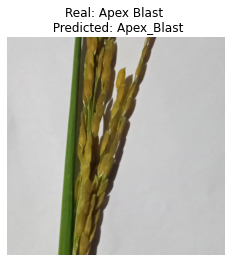

In [98]:
test_image= '/content/Dataset/val/apex_blast/IMG20201109203053_00.jpg'
Orginal = "Apex Blast"
open_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(150,150))
test_image=image.img_to_array(test_image)
test_image=test_image/255.0
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
result=np.argmax(result)
y.append(result)
Name=txt[result]
plt.imshow(open_image)
plt.title(f'Real: {Orginal} \n Predicted: {Name}')
plt.axis('off')
plt.show()

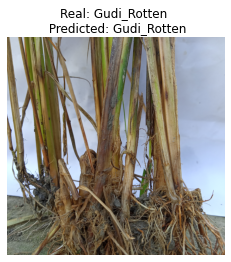

In [99]:
test_image= '/content/Dataset/val/Gudi_rotten/IMG20201109095426_00.jpg'
Orginal = "Gudi_Rotten"
open_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(150,150))
test_image=image.img_to_array(test_image)
test_image=test_image/255.0
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
result=np.argmax(result)
y.append(result)
Name=txt[result]
plt.imshow(open_image)
plt.title(f'Real: {Orginal} \n Predicted: {Name}')
plt.axis('off')
plt.show()

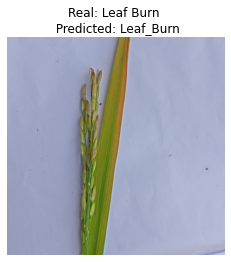

In [100]:
test_image= '/content/Dataset/val/leaf_burn/IMG20201109120340_00.jpg'
Orginal = "Leaf Burn"
open_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(150,150))
test_image=image.img_to_array(test_image)
test_image=test_image/255.0
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
result=np.argmax(result)
y.append(result)
Name=txt[result]
plt.imshow(open_image)
plt.title(f'Real: {Orginal} \n Predicted: {Name}')
plt.axis('off')
plt.show()

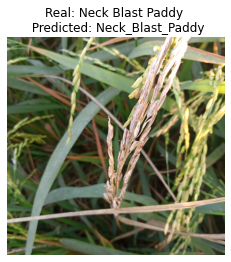

In [101]:
test_image= '/content/Dataset/val/neck_blast_paddy/IMG20201108163604_00.jpg'
Orginal = "Neck Blast Paddy"
open_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(150,150))
test_image=image.img_to_array(test_image)
test_image=test_image/255.0
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
result=np.argmax(result)
y.append(result)
Name=txt[result]
plt.imshow(open_image)
plt.title(f'Real: {Orginal} \n Predicted: {Name}')
plt.axis('off')
plt.show()

#### The model has predicts all the five classes successfully !!!